### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
path = "./seeds_dataset.csv"

df = pd.read_csv(path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1, 2, 3)          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB
None


In [3]:
df.head(10)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


### Separate features and labels

In [4]:
# last column is the label
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values   

print("X shape:", X.shape)
print("Unique labels:", np.unique(y))


X shape: (210, 7)
Unique labels: [1 2 3]


### Covariance Matrix

The sample covariance between variables $i$ and $j$ is given by:

$$
\Sigma_{ij}
=
\frac{1}{n-1}
\sum_{k=1}^{n}
\left(z_{k,i} - \bar{z}_i\right)
\left(z_{k,j} - \bar{z}_j\right)
$$

In [5]:
# mean of each feature
X_mean = X.mean(axis=0)
print("Feature means:\n", X_mean)

# Covariance matrix
X_centered = X - X_mean
n_samples = X_centered.shape[0]
cov = (X_centered.T @ X_centered) / (n_samples - 1)

print("\nCovariance matrix shape:", cov.shape)
print("\nCovariance matrix:\n", cov)


Feature means:
 [14.84752381 14.55928571  0.87099857  5.62853333  3.25860476  3.70020095
  5.40807143]

Covariance matrix shape: (7, 7)

Covariance matrix:
 [[ 8.46635078e+00  3.77844320e+00  4.18225658e-02  1.22470367e+00
   1.06691136e+00 -1.00435584e+00  1.23513290e+00]
 [ 3.77844320e+00  1.70552820e+00  1.63319511e-02  5.62665550e-01
   4.66064932e-01 -4.26765980e-01  5.71752539e-01]
 [ 4.18225658e-02  1.63319511e-02  5.58349328e-04  3.85182565e-03
   6.79771905e-03 -1.17765562e-02  2.63420680e-03]
 [ 1.22470367e+00  5.62665550e-01  3.85182565e-03  1.96305245e-01
   1.43991709e-01 -1.14289956e-01  2.03125110e-01]
 [ 1.06691136e+00  4.66064932e-01  6.79771905e-03  1.43991709e-01
   1.42668202e-01 -1.46542890e-01  1.39068229e-01]
 [-1.00435584e+00 -4.26765980e-01 -1.17765562e-02 -1.14289956e-01
  -1.46542890e-01  2.26068405e+00 -8.18705222e-03]
 [ 1.23513290e+00  5.71752539e-01  2.63420680e-03  2.03125110e-01
   1.39068229e-01 -8.18705222e-03  2.41553081e-01]]


### Eigenvalues and Eigenvectors

The  equation to find the **eigenvalues** of a square matrix $A$ is:

$$
\det(A - \lambda I) = 0
$$

Once $\lambda$ is known, an **eigenvector** $v$ satisfies:

$$
A\,v = \lambda\,v
$$


In [6]:
# eigenvalues and eigenvectors of the covariance matrix
eigvals, eigvecs = np.linalg.eigh(cov)

# eigenvalues and eigenvectors in descending order 
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("Eigenvalues:\n", eigvals)
print("\nEigenvectors:\n", eigvecs)

Eigenvalues:
 [1.07933269e+01 2.12945512e+00 7.36300330e-02 1.28874947e-02
 2.74822668e-03 1.57044980e-03 2.96554425e-05]

Eigenvectors:
 [[-0.8842285  -0.10080577  0.26453354 -0.19944949  0.13717297 -0.28063956
  -0.02539824]
 [-0.39540542 -0.05648963 -0.28251995  0.57881686 -0.57475603  0.30155864
   0.0658399 ]
 [-0.00431132  0.00289474  0.05903584 -0.05776023  0.05310454  0.04522905
   0.99412565]
 [-0.12854448 -0.03062173 -0.40014946  0.43610024  0.78699776  0.11343761
   0.00143143]
 [-0.11105914 -0.00237229  0.31923869 -0.23416358  0.1448029   0.89626785
  -0.0815499 ]
 [ 0.12761562 -0.98941048  0.06429754  0.02514736  0.00157564 -0.003288
   0.00114269]
 [-0.1289665  -0.08223339 -0.76193973 -0.61335659 -0.08765361  0.10992364
   0.00897193]]


### Explained variance ratio



$$
\text{Explained Variance Ratio}_i
=
\frac{\lambda_i}{\sum_{j} \lambda_j}
$$

where $\lambda_i$ is the $i$-th eigenvalue and $\sum_{j} \lambda_j$ is the sum of all eigenvalues.


In [37]:
# proportion of variance explained by each principal component
explained_variance_ratio = eigvals / eigvals.sum()

# cumulative explained variance
cumulative = explained_variance_ratio.cumsum()

for i in range(len(explained_variance_ratio)):
    print( f"PC{i+1}: explained={explained_variance_ratio[i]:.4f}, " f"cumulative={cumulative[i]:.4f}")


PC1: explained=0.8294, cumulative=0.8294
PC2: explained=0.1636, cumulative=0.9930
PC3: explained=0.0057, cumulative=0.9987
PC4: explained=0.0010, cumulative=0.9997
PC5: explained=0.0002, cumulative=0.9999
PC6: explained=0.0001, cumulative=1.0000
PC7: explained=0.0000, cumulative=1.0000


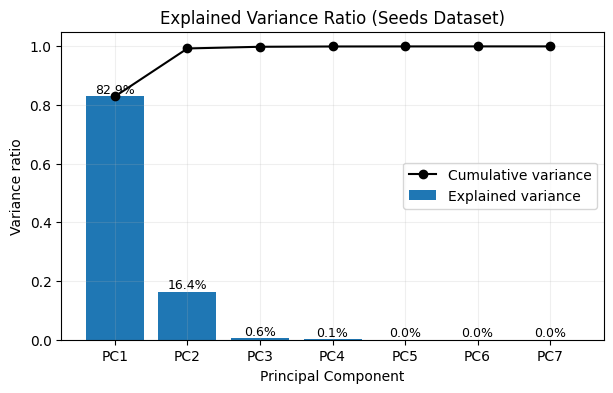

In [8]:
plt.figure(figsize=(7, 4))

x = np.arange(1, len(explained_variance_ratio) + 1)

plt.bar(x, explained_variance_ratio, label="Explained variance")
plt.plot(x, cumulative, "o-k", label="Cumulative variance")

# Percentage labels
for i, ratio in enumerate(explained_variance_ratio):
    plt.text(i + 1, ratio, f"{ratio*100:.1f}%", ha="center", va="bottom", fontsize=9)

plt.xticks(x, [f"PC{i}" for i in x])
plt.xlabel("Principal Component")
plt.ylabel("Variance ratio")
plt.title("Explained Variance Ratio (Seeds Dataset)")
plt.grid(alpha=0.2)
plt.legend(loc="center right")

plt.show()


### Project data onto original dimensional feature space

Let $B$ contain the first $k=2$ eigenvectors as columns.

The projection matrix onto the subspace spanned by $B$ is

$$
P = B (B^T B)^{-1} B^T
$$

The data matrix $X$ is projected using

$$
X_{\text{proj}} = (P X^T)^T
$$


In [30]:
# the first k principal eigenvectors 
k = 2
B = eigvecs[:, :k]  

# projection matrix 
BTB_inv = np.linalg.inv(B.T @ B)
P = B @ BTB_inv @ B.T

print("Projection matrix P shape:", P.shape)

# Projected data matrix X 
X_proj = (P @ X_centered.T).T

print("\n Projected Data:\n", X_proj)


Projection matrix P shape: (7, 7)

 Projected Data:
 [[ 4.43765826e-01  1.82267151e-01  6.96312200e-03 ...  7.03197054e-02
  -1.48697860e+00 -3.09884973e-02]
 [ 8.03149944e-03 -2.70972983e-02  9.14556987e-03 ...  2.86780127e-02
  -2.70103547e+00 -1.80434031e-01]
 [-6.98094684e-01 -3.25083371e-01  4.27794342e-04 ... -7.60387479e-02
  -1.03523421e+00 -1.78229888e-01]
 ...
 [-1.77633352e+00 -7.45171632e-01 -2.32489114e-02 ... -2.67431863e-01
   4.58138911e+00  3.18379521e-02]
 [-2.99927107e+00 -1.34719533e+00 -1.28450914e-02 ... -3.71303915e-01
  -9.45018945e-02 -4.72922863e-01]
 [-2.59156082e+00 -1.14119735e+00 -1.78838109e-02 ... -3.41445478e-01
   1.92991831e+00 -2.73328185e-01]]


# 2D coordinates of Projected Data

In [35]:
# Convert projected data to 2D PCA coordinates
X_proj_2d = X_proj @ B  

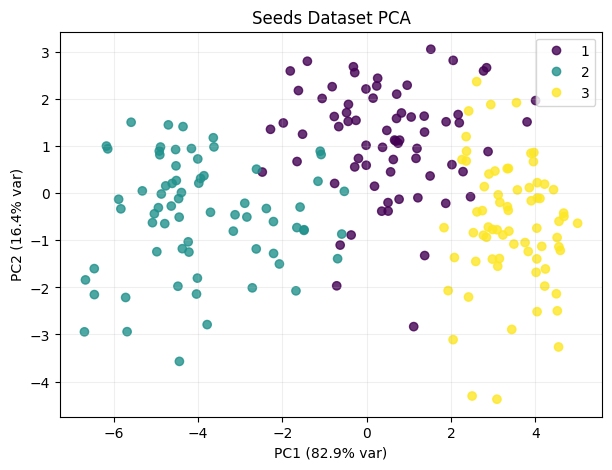

In [36]:
labels, y_int = np.unique(y, return_inverse=True)

plt.figure(figsize=(7, 5))
scatter = plt.scatter(
    X_proj_2d[:, 0],
    X_proj_2d[:, 1],
    c=y_int,
    alpha=0.8
)

plt.xlabel(f"PC1 ({explained_variance_ratio[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]*100:.1f}% var)")
plt.title("Seeds Dataset PCA")
plt.grid(True, alpha=0.2)

plt.legend(
    handles=scatter.legend_elements()[0],
    labels=labels.tolist()
)

plt.show()
